### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

### Creating a connection

In [2]:
mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="2K23 GIFT"
)

In [3]:
# Testing a query

query = "select * from bankingSystem.data"
df = pd.read_sql(query, mydb)
mydb.close()

C:\Users\DEBOJIT\AppData\Local\Temp\ipykernel_17820\3936099216.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


In [4]:
df.head()
df.shape
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [5]:
# checking for null values
df.isnull().sum()

ï»¿Client ID                0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [6]:
bins = [0, 100000, 300000, float('inf')]
labels = ['low', 'medium', 'high']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels)

In [7]:
df['Income Band'].value_counts()

Income Band
medium    1517
low       1027
high       456
Name: count, dtype: int64

<Axes: xlabel='Income Band'>

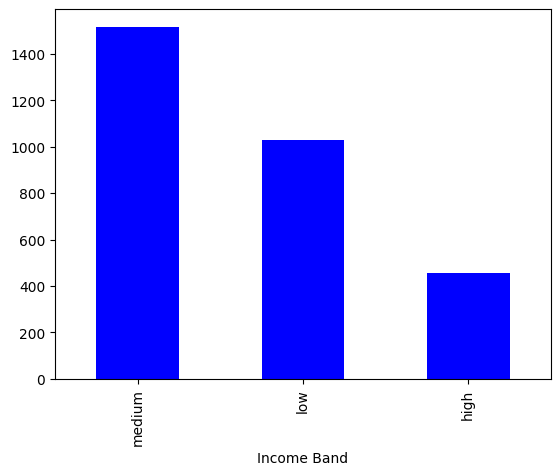

In [8]:
df['Income Band'].value_counts().plot(kind='bar', color='blue')

#### Univariate Analysis

Value counts for : BRId


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

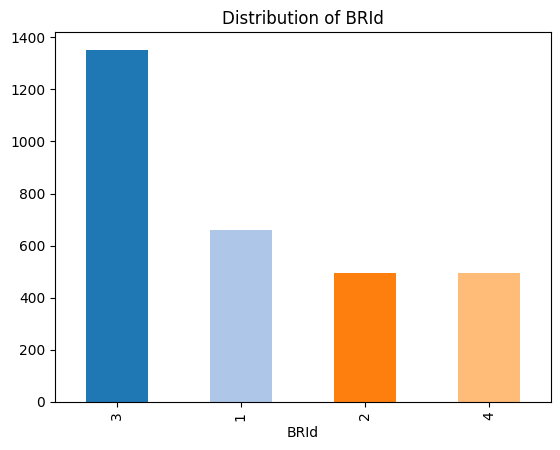

Value counts for : GenderId


GenderId
2    1512
1    1488
Name: count, dtype: int64

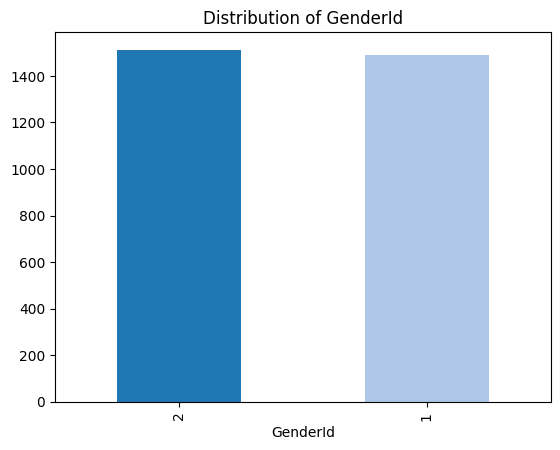

Value counts for : IAId


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

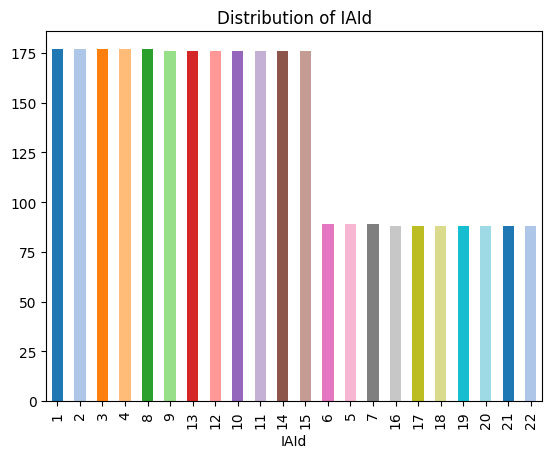

Value counts for : Amount of Credit Cards


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

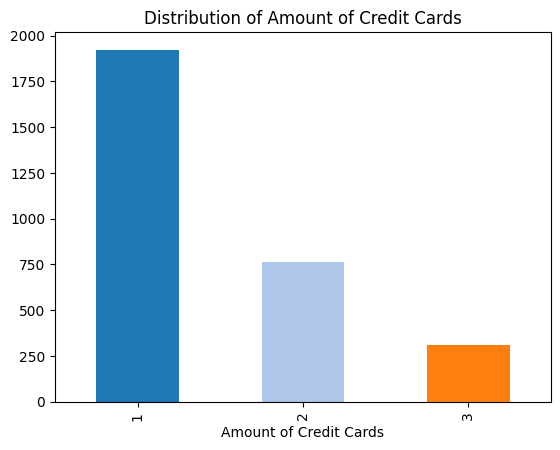

Value counts for : Nationality


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

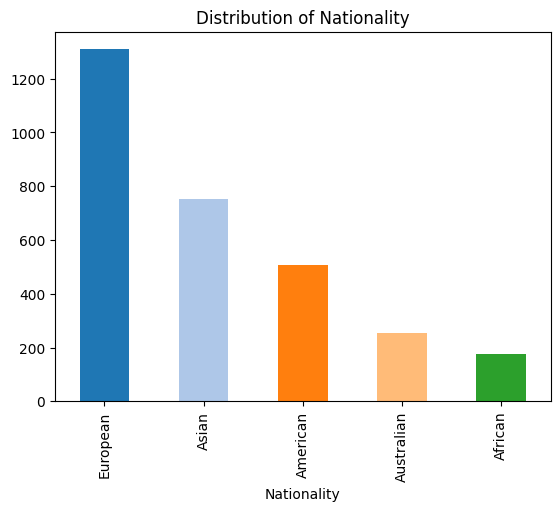

Value counts for : Occupation


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

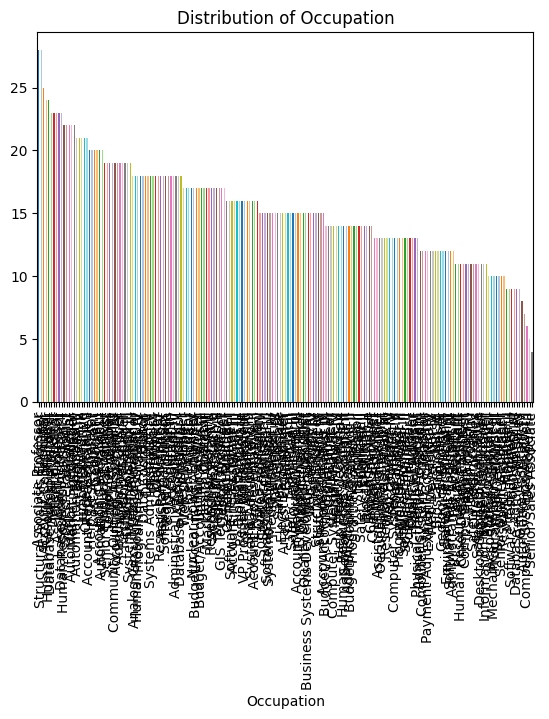

Value counts for : Fee Structure


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

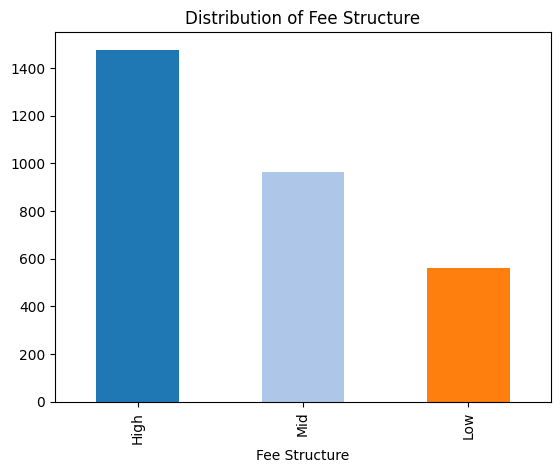

Value counts for : Loyalty Classification


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

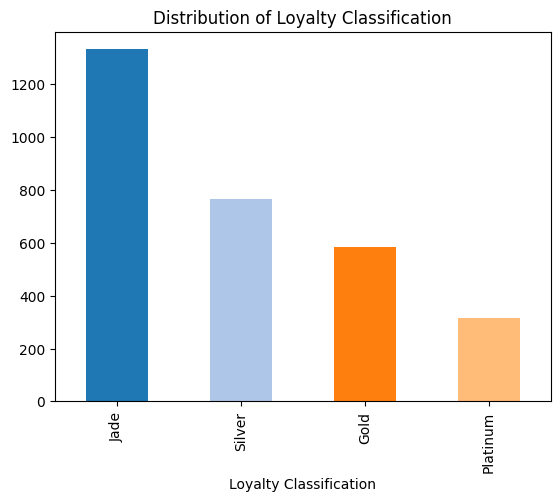

Value counts for : Properties Owned


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

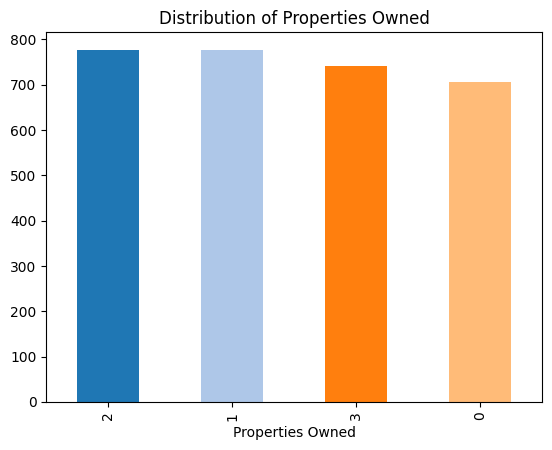

Value counts for : Risk Weighting


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

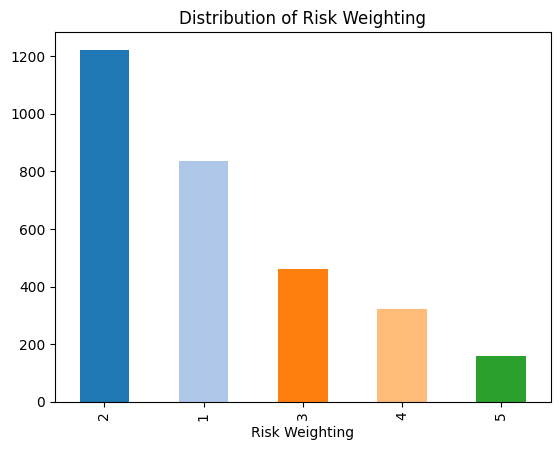

Value counts for : Income Band


Income Band
medium    1517
low       1027
high       456
Name: count, dtype: int64

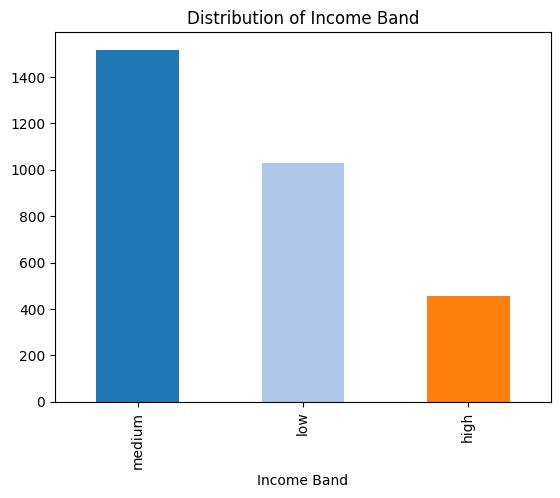

In [9]:
# Examine the distribution of unique categories in categoricals columns

categorical_cols = df[['BRId', 'GenderId',
                       'IAId', 'Amount of Credit Cards', 'Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification', 'Properties Owned', 'Risk Weighting', 'Income Band']].columns
for cols in categorical_cols:
    print(f'Value counts for : {cols}')
    counts = (df[cols].value_counts())
    display(counts)
    # plt.figure(figsize=(12, 8))
    counts.plot(kind='bar', color=plt.cm.tab20.colors)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.show()

#### Bivariate Analysis

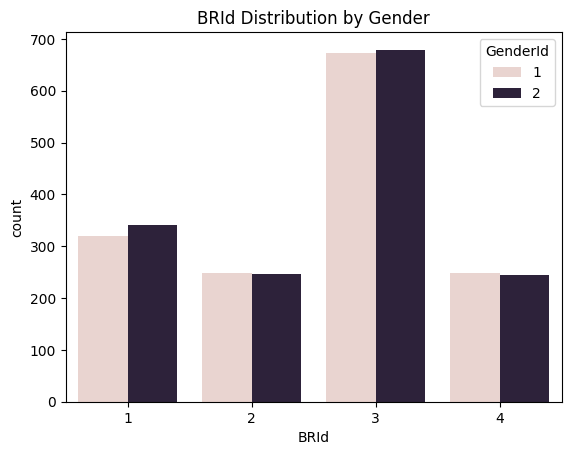

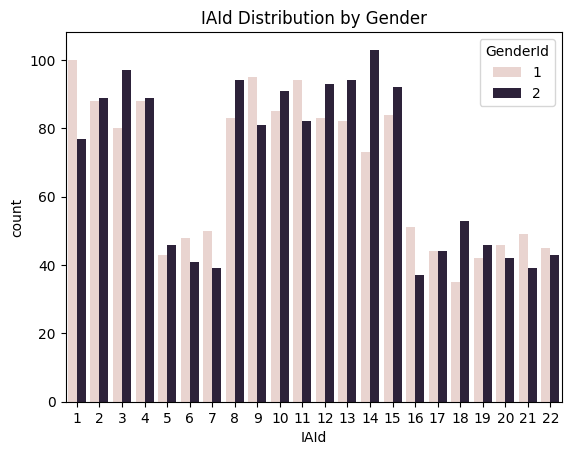

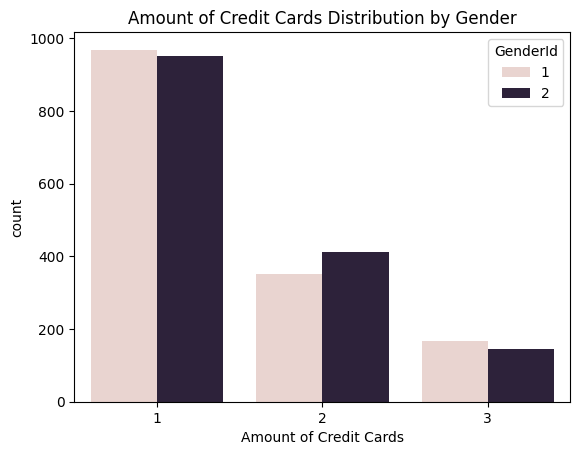

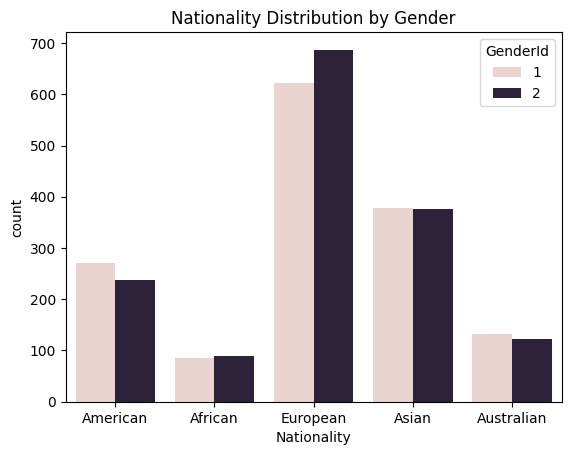

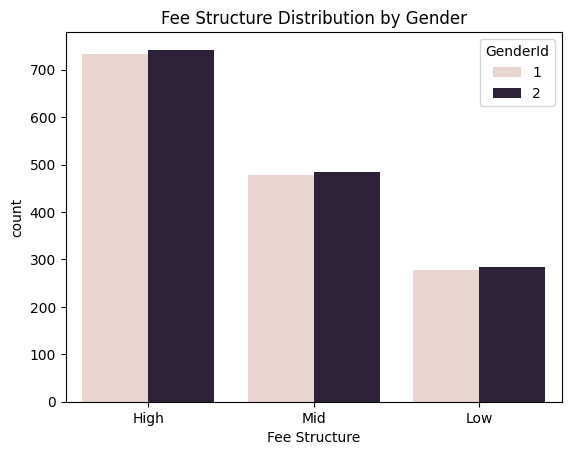

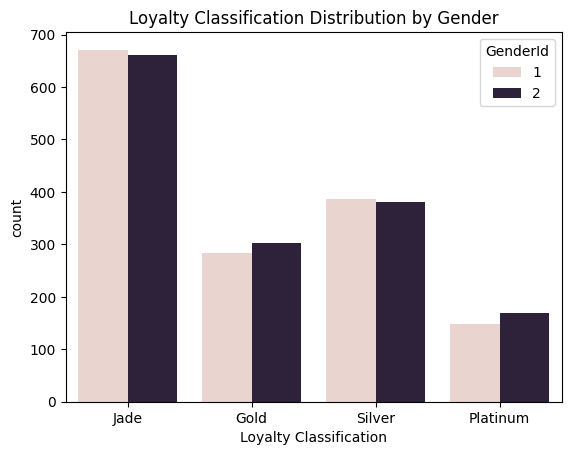

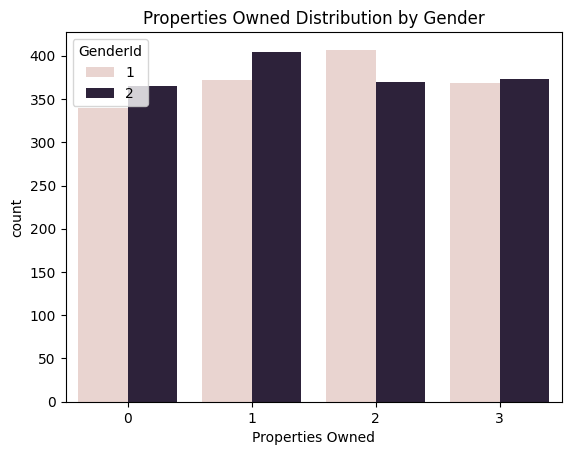

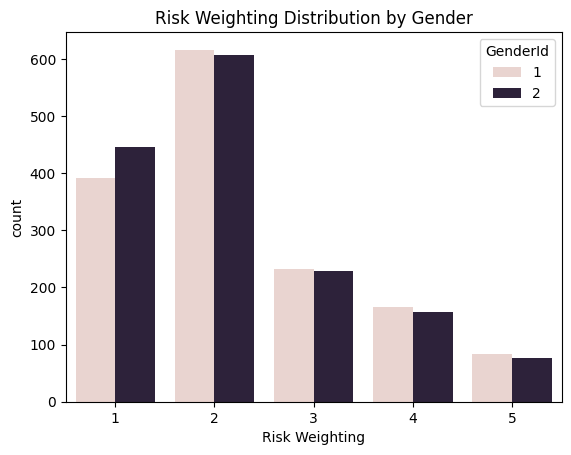

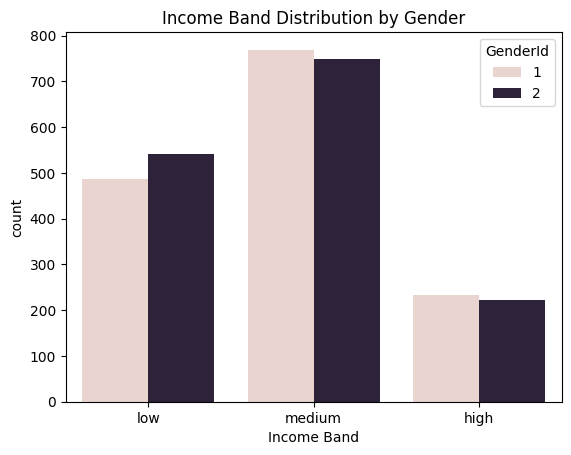

In [10]:
for cols in categorical_cols:
    if cols != 'GenderId' and cols != 'Occupation':
        sns.countplot(data=df, x=cols, hue="GenderId")
        plt.title(f"{cols} Distribution by Gender")
        plt.show()

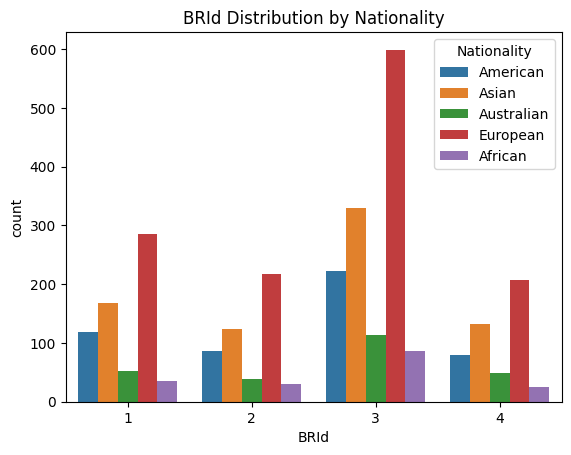

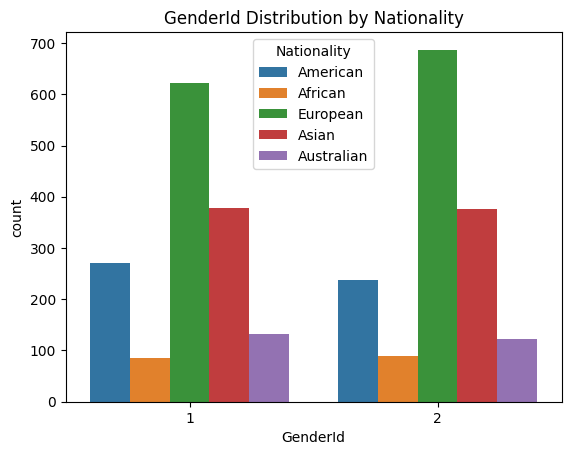

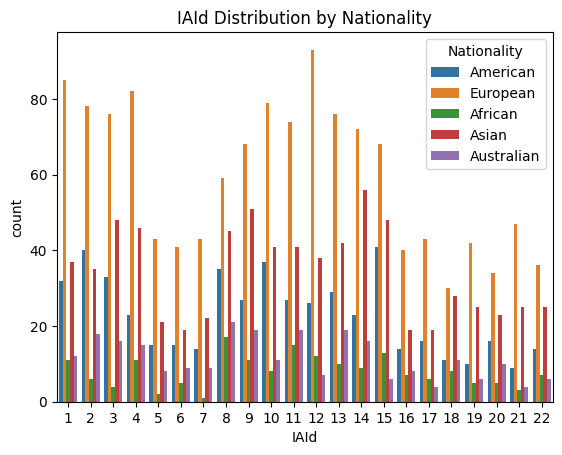

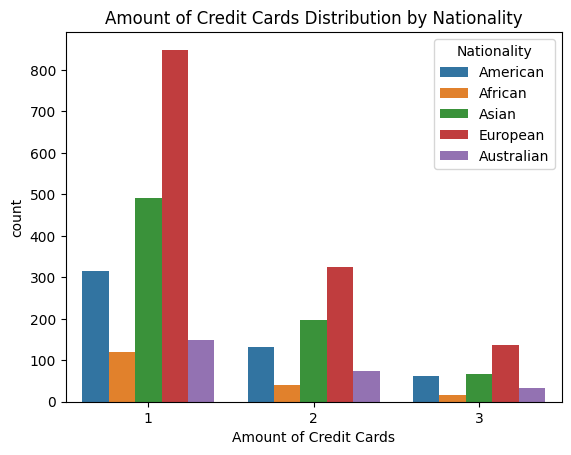

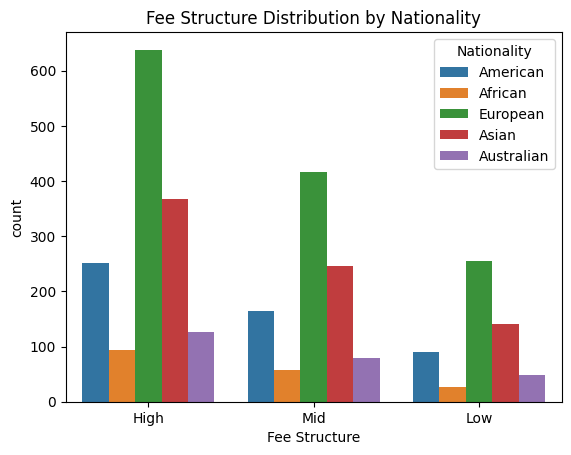

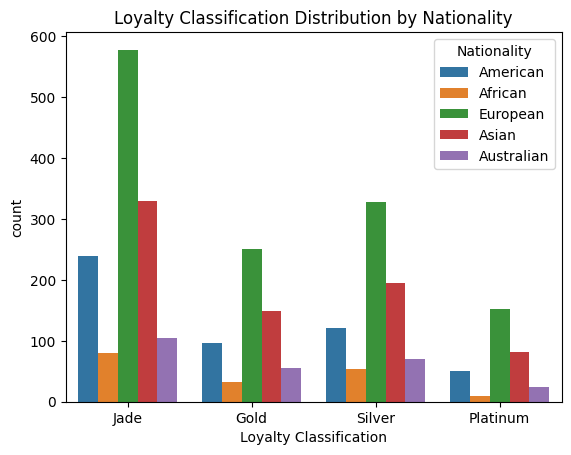

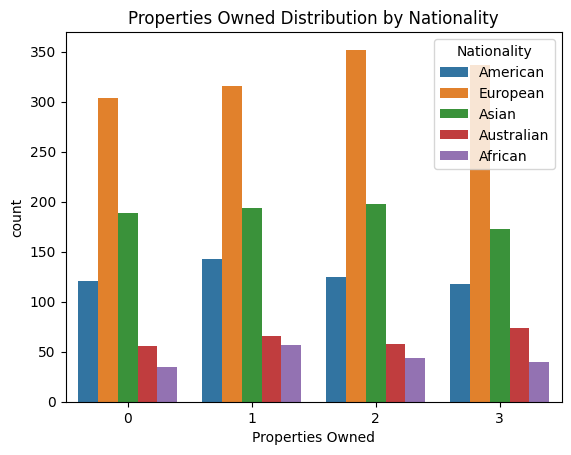

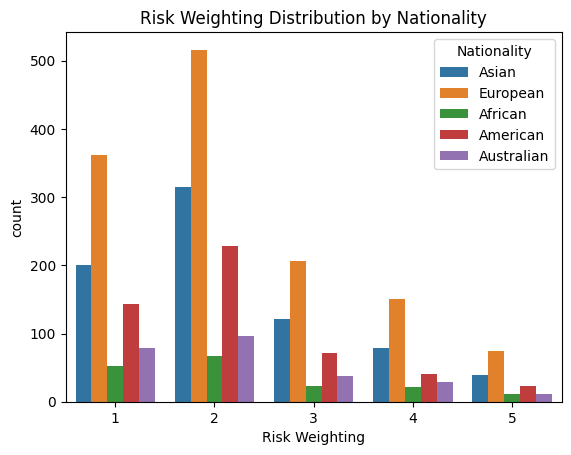

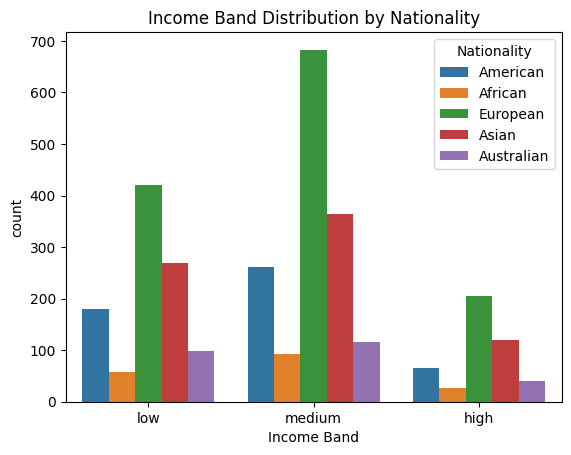

In [11]:
for cols in categorical_cols:
    if cols != 'Nationality' and cols != 'Occupation':
        sns.countplot(data=df, x=cols, hue="Nationality")
        plt.title(f"{cols} Distribution by Nationality")
        plt.show()

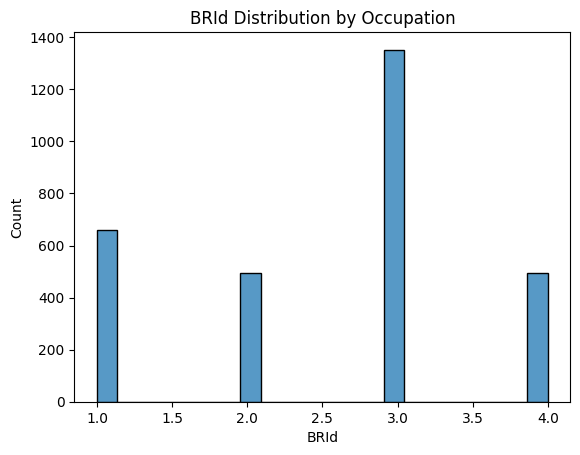

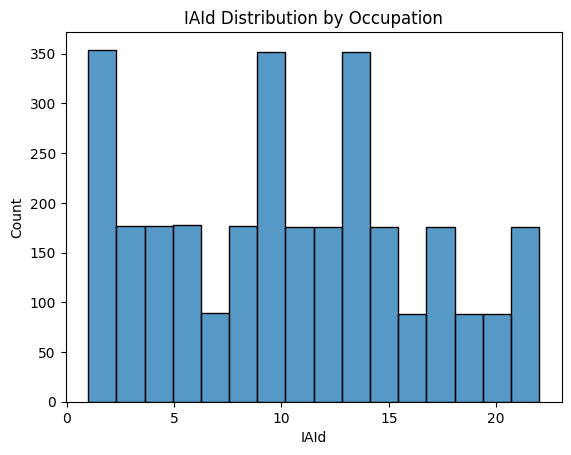

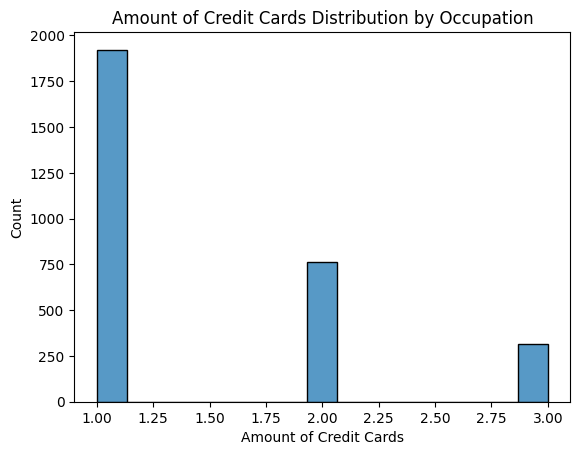

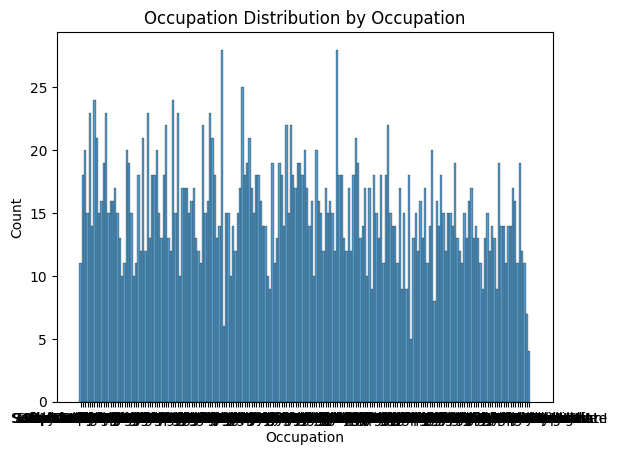

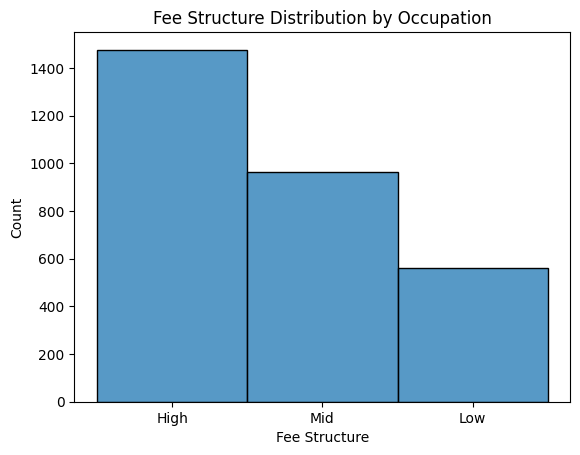

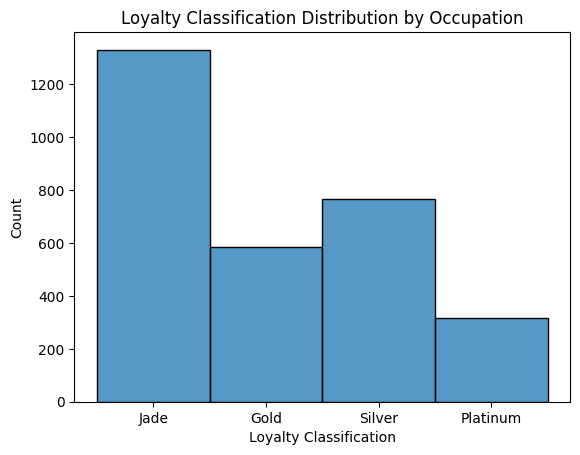

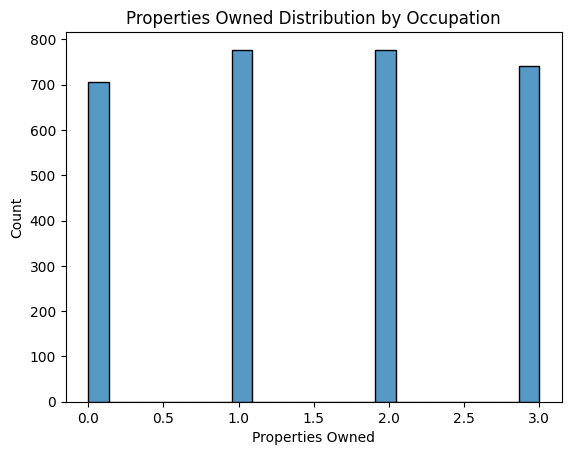

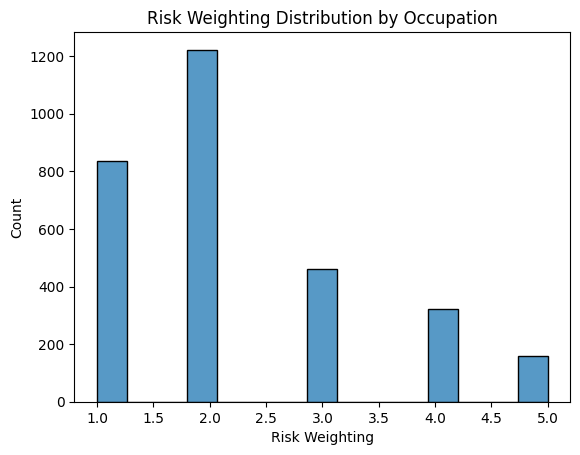

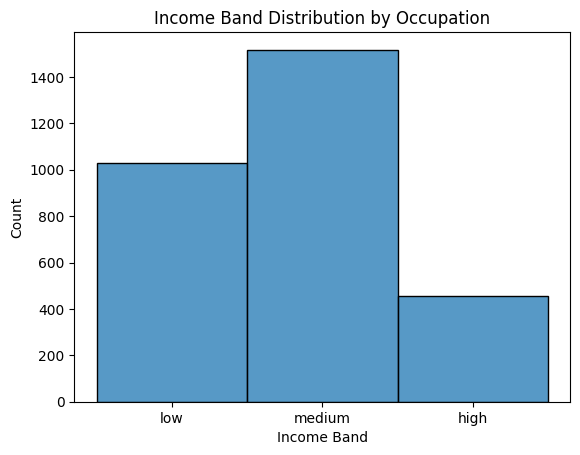

In [12]:
# Histplot for different occupations
for cols in categorical_cols:
    if cols != 'Nationality' and cols != 'GenderId':
        sns.histplot(data=df[cols])
        plt.title(f"{cols} Distribution by Occupation")
        plt.xlabel(cols)
        plt.ylabel("Count")
        plt.show()

#### Numerical Analysis

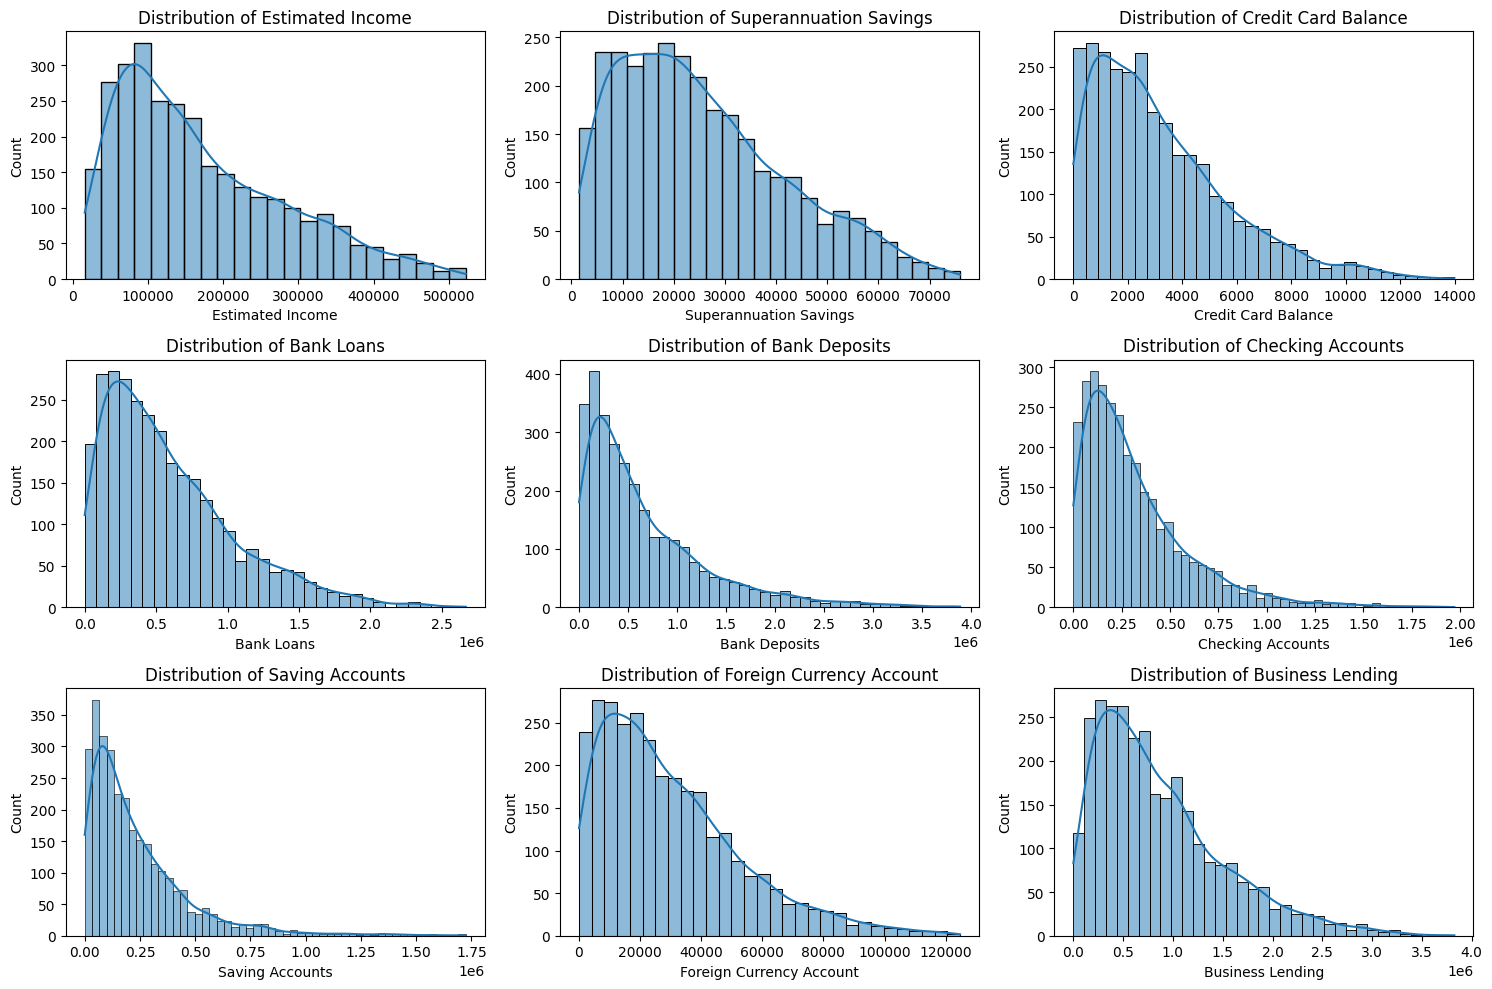

In [13]:
# Univariate Analysis and visualization

numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans',
                  'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# plt.figure(figsize=(8, 4))
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # plt.subplot(2, 1, i + 1)
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


#### Heatmaps -> to see the correlation between the attributes

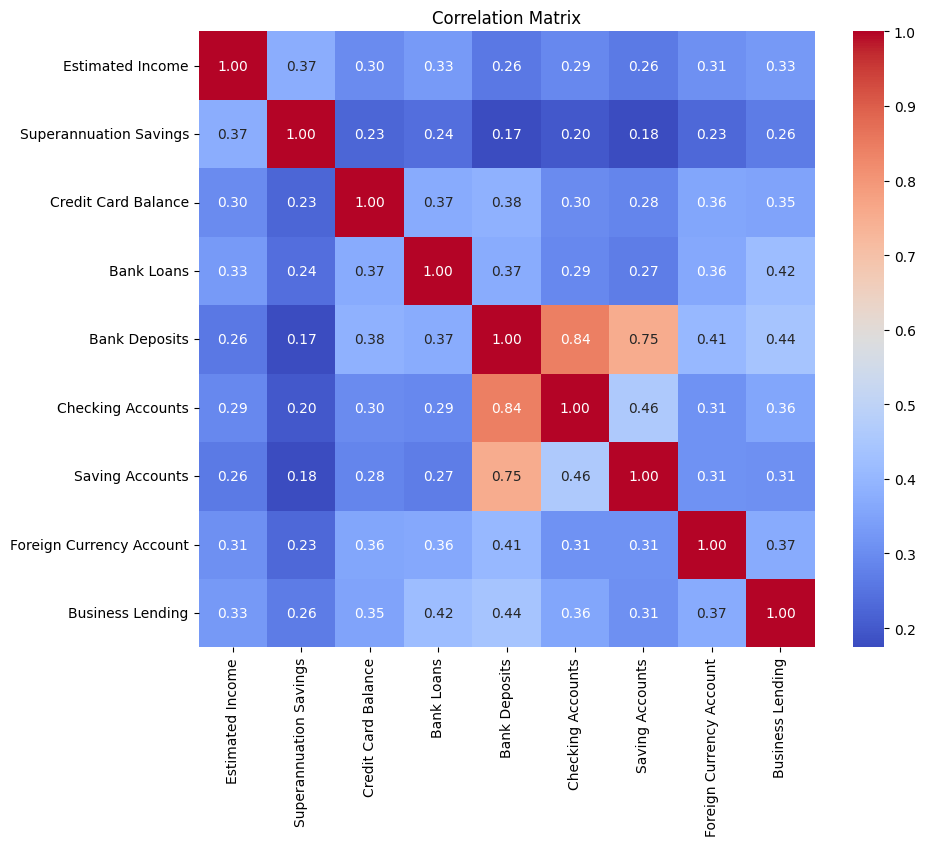

In [14]:
correlationMatrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

#### Insights of EDA

1. The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Accounts" indicate that customers who maintain high balances in one account type often hold substantial amount across other accounts as well 